<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


In [18]:
!pip install yfinance

In [1]:
!pip install yfinance requests beautifulsoup4 pandas matplotlib plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 94.4 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 157.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 146.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 133.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 146.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 123.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-linux_x86_64.whl size=303803 sha256=5caed9b3b66c2d12fe500ad5cb792cb96a15779f8b932d838f6cd983867c0c49
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/1a/57/6a/bb71346

# Question 1: Extract Tesla Stock Data

In [2]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Extract Tesla Revenue Data

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Initialize a list to store rows
data = []

# Find the table body (adjust index [1] if needed)
for row in soup.find_all("tbody")[1].find_all("tr"):
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data.append({"Date": date, "Revenue": revenue})

# Create DataFrame from the list
tesla_revenue = pd.DataFrame(data)

# Display last 5 rows
tesla_revenue.tail()

,Date,Revenue
49,2010-06-30,$28
50,2010-03-31,$21
51,2009-12-31,
52,2009-09-30,$46
53,2009-06-30,$27


# Question 3: Extract GameStop Stock Data

In [5]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Extract GameStop Revenue Data

In [6]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

gme_revenue.tail()

AttributeError: 'DataFrame' object has no attribute 'append'

# Question 5: Plot Tesla Dashboard

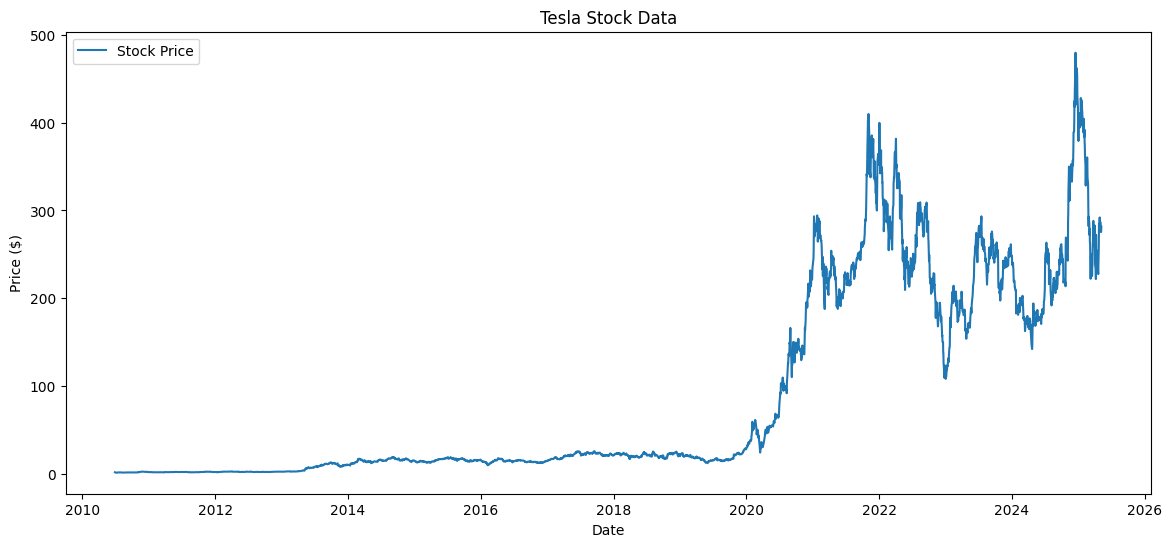

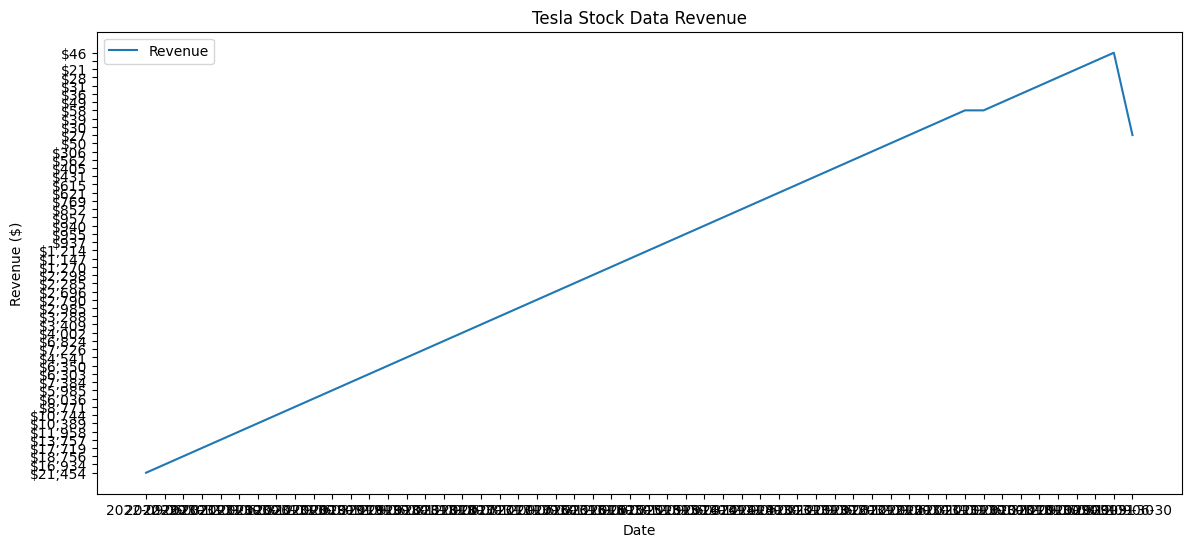

In [7]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(14, 6))
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue')
    plt.title(f"{title} Revenue")
    plt.xlabel('Date')
    plt.ylabel('Revenue ($)')
    plt.legend()
    plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data')

# Question 6: Plot GameStop Dashboard

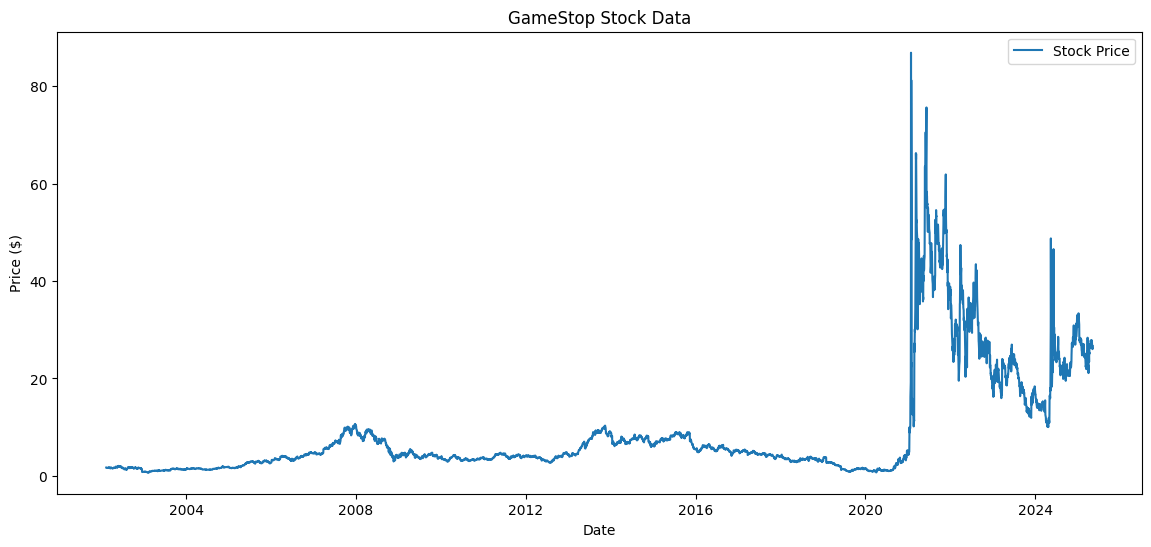

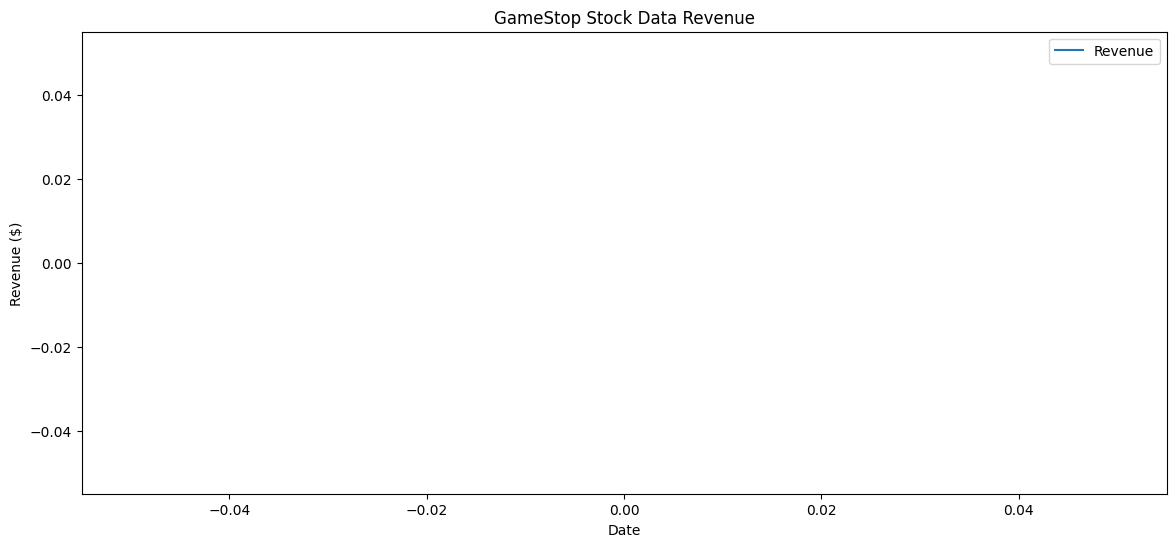

In [8]:
make_graph(gme_data, gme_revenue, 'GameStop Stock Data')